In [6]:
## run if u wanna open corpus preloaded
import pickle
with open('corpus_sexperto_with_lemma_with_s-08062020.pkl', 'rb') as corpus_import_file:
    corpus = pickle.load(corpus_import_file)
len(corpus)

In [17]:
from gensim.models import Word2Vec 

In [21]:
import multiprocessing

In [74]:
# min_count = ignore all words with total frequency lower than this.
words_min_count = 70
# number of features
# window is the maximum distance between the current and predicted word within a sentence.
features_size = 500
# window size
# window is the maximum distance between the current and predicted word within a sentence.
words_distance_window = 4
#  if 1 (default), sort the vocabulary by descending frequency before assigning word indexes.
sorted_vocab = 1
# sg defines the training algorithm. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed.
train_algorithm = 1

#negative = if > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). 
# Default is 5. If set to 0, no negative samping is used.
negative_sampling = 5

#  limit RAM during vocabulary building; if there are more unique words than this, then prune the infrequent ones. 
# Every 10 million word types need about 1GB of RAM. Set to None for no limit (default).
max_vocab_memory_size = None

iter_number = 2

workers_number= multiprocessing.cpu_count()

model = Word2Vec(corpus, 
        sg = train_algorithm, 
        min_count=words_min_count, 
        size=features_size, 
        window=words_distance_window, 
        sorted_vocab=sorted_vocab,
        negative=negative_sampling,
        max_vocab_size=max_vocab_memory_size,
        workers=workers_number)

In [87]:
model.wv.index2entity[:100]

['sexual',
 'relacionar',
 'infeccion',
 'personar',
 'salud',
 'embarazar',
 'condon',
 'anticonceptivo',
 'poder',
 'transmision',
 'asistir',
 'parejo',
 'recomer',
 'anticoncepcion',
 'consultar',
 'ano',
 'sentir',
 'relacion',
 'casar',
 'tomar',
 'informacion',
 'presentar',
 'sexo',
 'derecho',
 'pagina',
 'medicar',
 'penar',
 'causar',
 'citar',
 'genital',
 'desear',
 'sangrar',
 'tipo',
 'dolor',
 'recibir',
 'sexualidad',
 'adecuar',
 'prevenir',
 'querer',
 'normal',
 'vaginal',
 'entidad',
 'edad',
 'atencion',
 'hormonal',
 'practicar',
 'metodos',
 'vida',
 'pastilla',
 'asesoria',
 'oral',
 'iniciar',
 'vagina',
 'menstrual',
 'menstruacion',
 'cuerpo',
 'efecto',
 'vih',
 'enfermedad',
 'sexperto',
 'segundo',
 'problema',
 'orientacion',
 'emergencia',
 'eyaculacion',
 'situacion',
 'violencia',
 'ayudar',
 'encontrar',
 'siguiente',
 'caso',
 'reproductivo',
 'penetracion',
 'necesidad',
 'femenino',
 'sintomas',
 'proteger',
 'probar',
 'medicamento',
 'solicitar'

In [100]:
links = []
for word in model.wv.index2entity[:20]:
    similar_words = [w[0] for w in model.wv.most_similar(word, topn=2)]
    for s_word in similar_words:
        links.append("-".join(sorted([word, s_word])))

In [101]:
s_links = list(set(links))

In [102]:
len(s_links)

36

In [103]:
s_links[:300]

['dudar-poder',
 'asistir-entidad',
 'casar-situacion',
 'anticoncepcion-citar',
 'casar-caso',
 'recibir-salud',
 'parejo-practicar',
 'infeccion-transmision',
 'posibilidad-relacion',
 'embarazar-iniciar',
 'relacionar-tipo',
 'recomer-valoracion',
 'asesoria-asistir',
 'atencion-consultar',
 'condon-transmision',
 'condon-infeccion',
 'disfrutar-parejo',
 'anticoncepcion-necesidad',
 'personar-sexualidad',
 'poder-seguro',
 'ano-pagina',
 'efectividad-tomar',
 'acto-personar',
 'consultar-solicitar',
 'sexual-vih',
 'sentir-sexo',
 'anticonceptivo-metodos',
 'identificar-sentir',
 'relacion-tipo',
 'ano-milisegundo',
 'disminuir-embarazar',
 'anticonceptivo-efectividad',
 'asistir-recomer',
 'emergencia-tomar',
 'relacionar-sexual',
 'salud-solicitar']

In [50]:
model.wv.most_similar('embarazo', topn=50)

['prevenir',
 'planear',
 'protegerte',
 'prevencion',
 'condon',
 'doblar',
 'trasmision',
 'unico',
 'adicionalmente',
 'proteger',
 'its',
 'efectivo',
 'adecuadamente',
 'duracion',
 'correcto',
 'correctamente',
 'largo',
 'condonar',
 'adecuar',
 'transmision',
 'infeccion',
 'desear',
 'preservativo',
 'recomendar',
 'barrera',
 'metodos',
 'usarlo',
 'aconsejar',
 'descartar',
 'seleccionar',
 'usarse',
 'embarazar',
 'utilizarlo',
 'escoger',
 'relacionar',
 'inquietud',
 'tipo',
 'haber',
 'iniciar',
 'sifilis',
 'algun',
 'acercar',
 'anticoncepcion',
 'eficacia',
 'recomendable',
 'servir',
 'asesorarte',
 'mes',
 'disponible',
 'contagiarse']

In [39]:
model.save( "modelo–entrenado-15072020" )

In [40]:
print(len(model.wv.vocab))

4596


/Users/davidbautista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


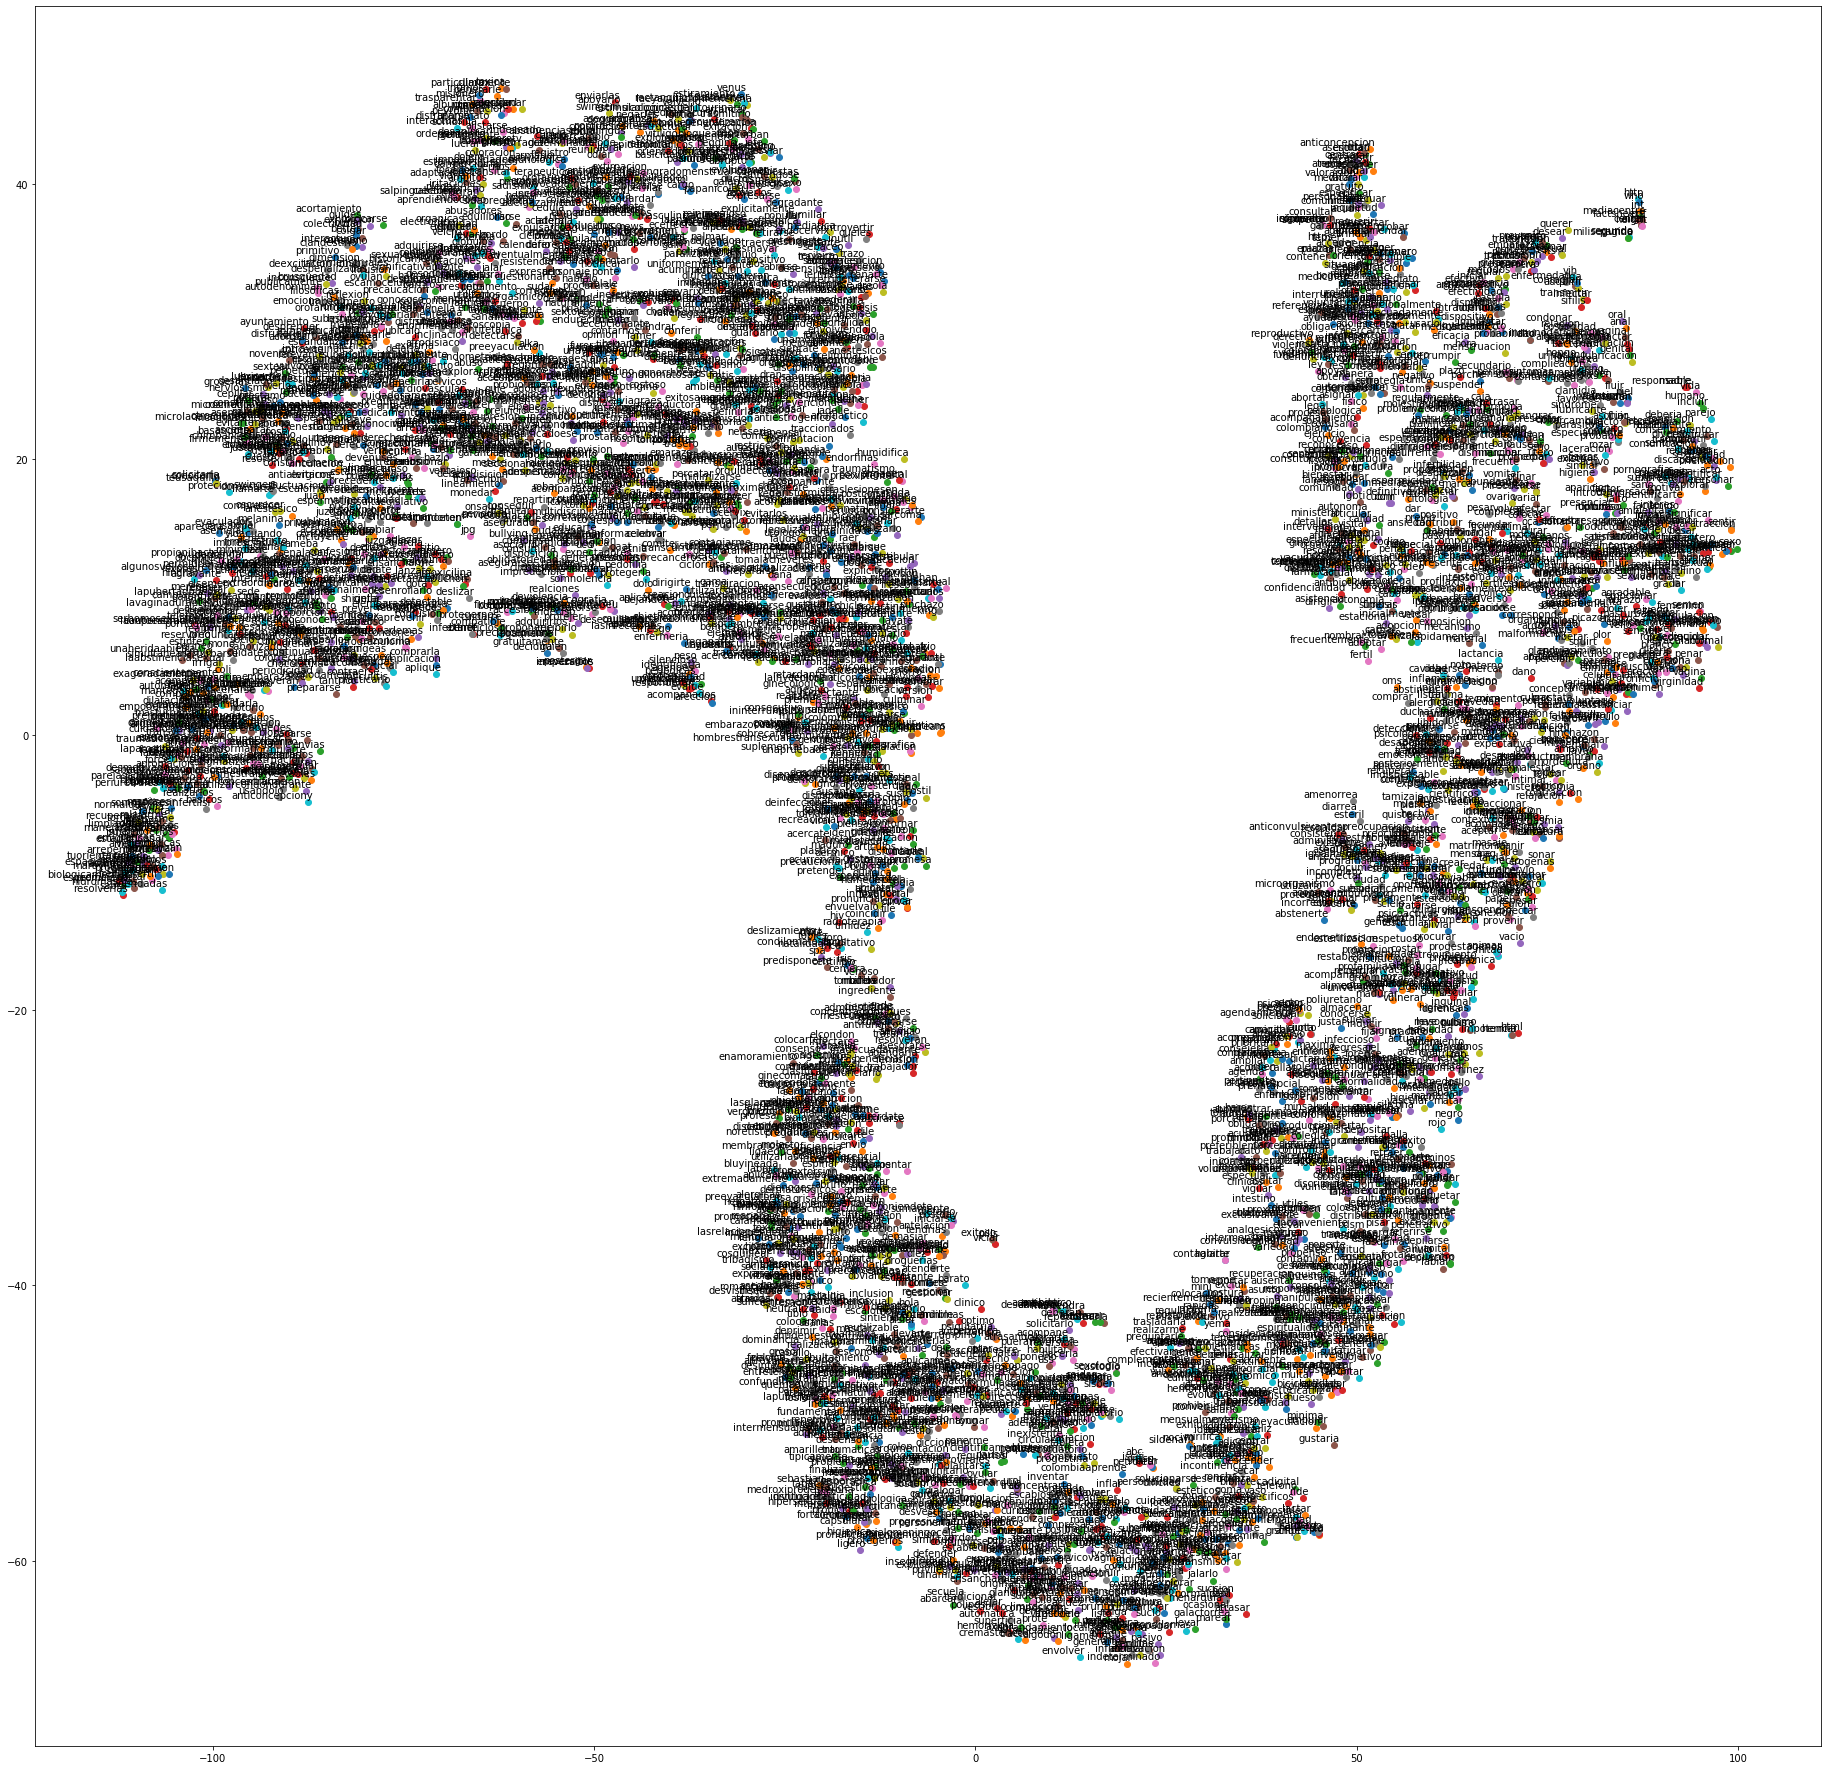

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# define the function to compute the dimensionality reduction
# and then produce the biplot

"Creates a TSNE model and plots it"
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(32, 32)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig('foo_comp_15072020.png')
plt.savefig('foo_comp_15072020.pdf')

/Users/davidbautista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


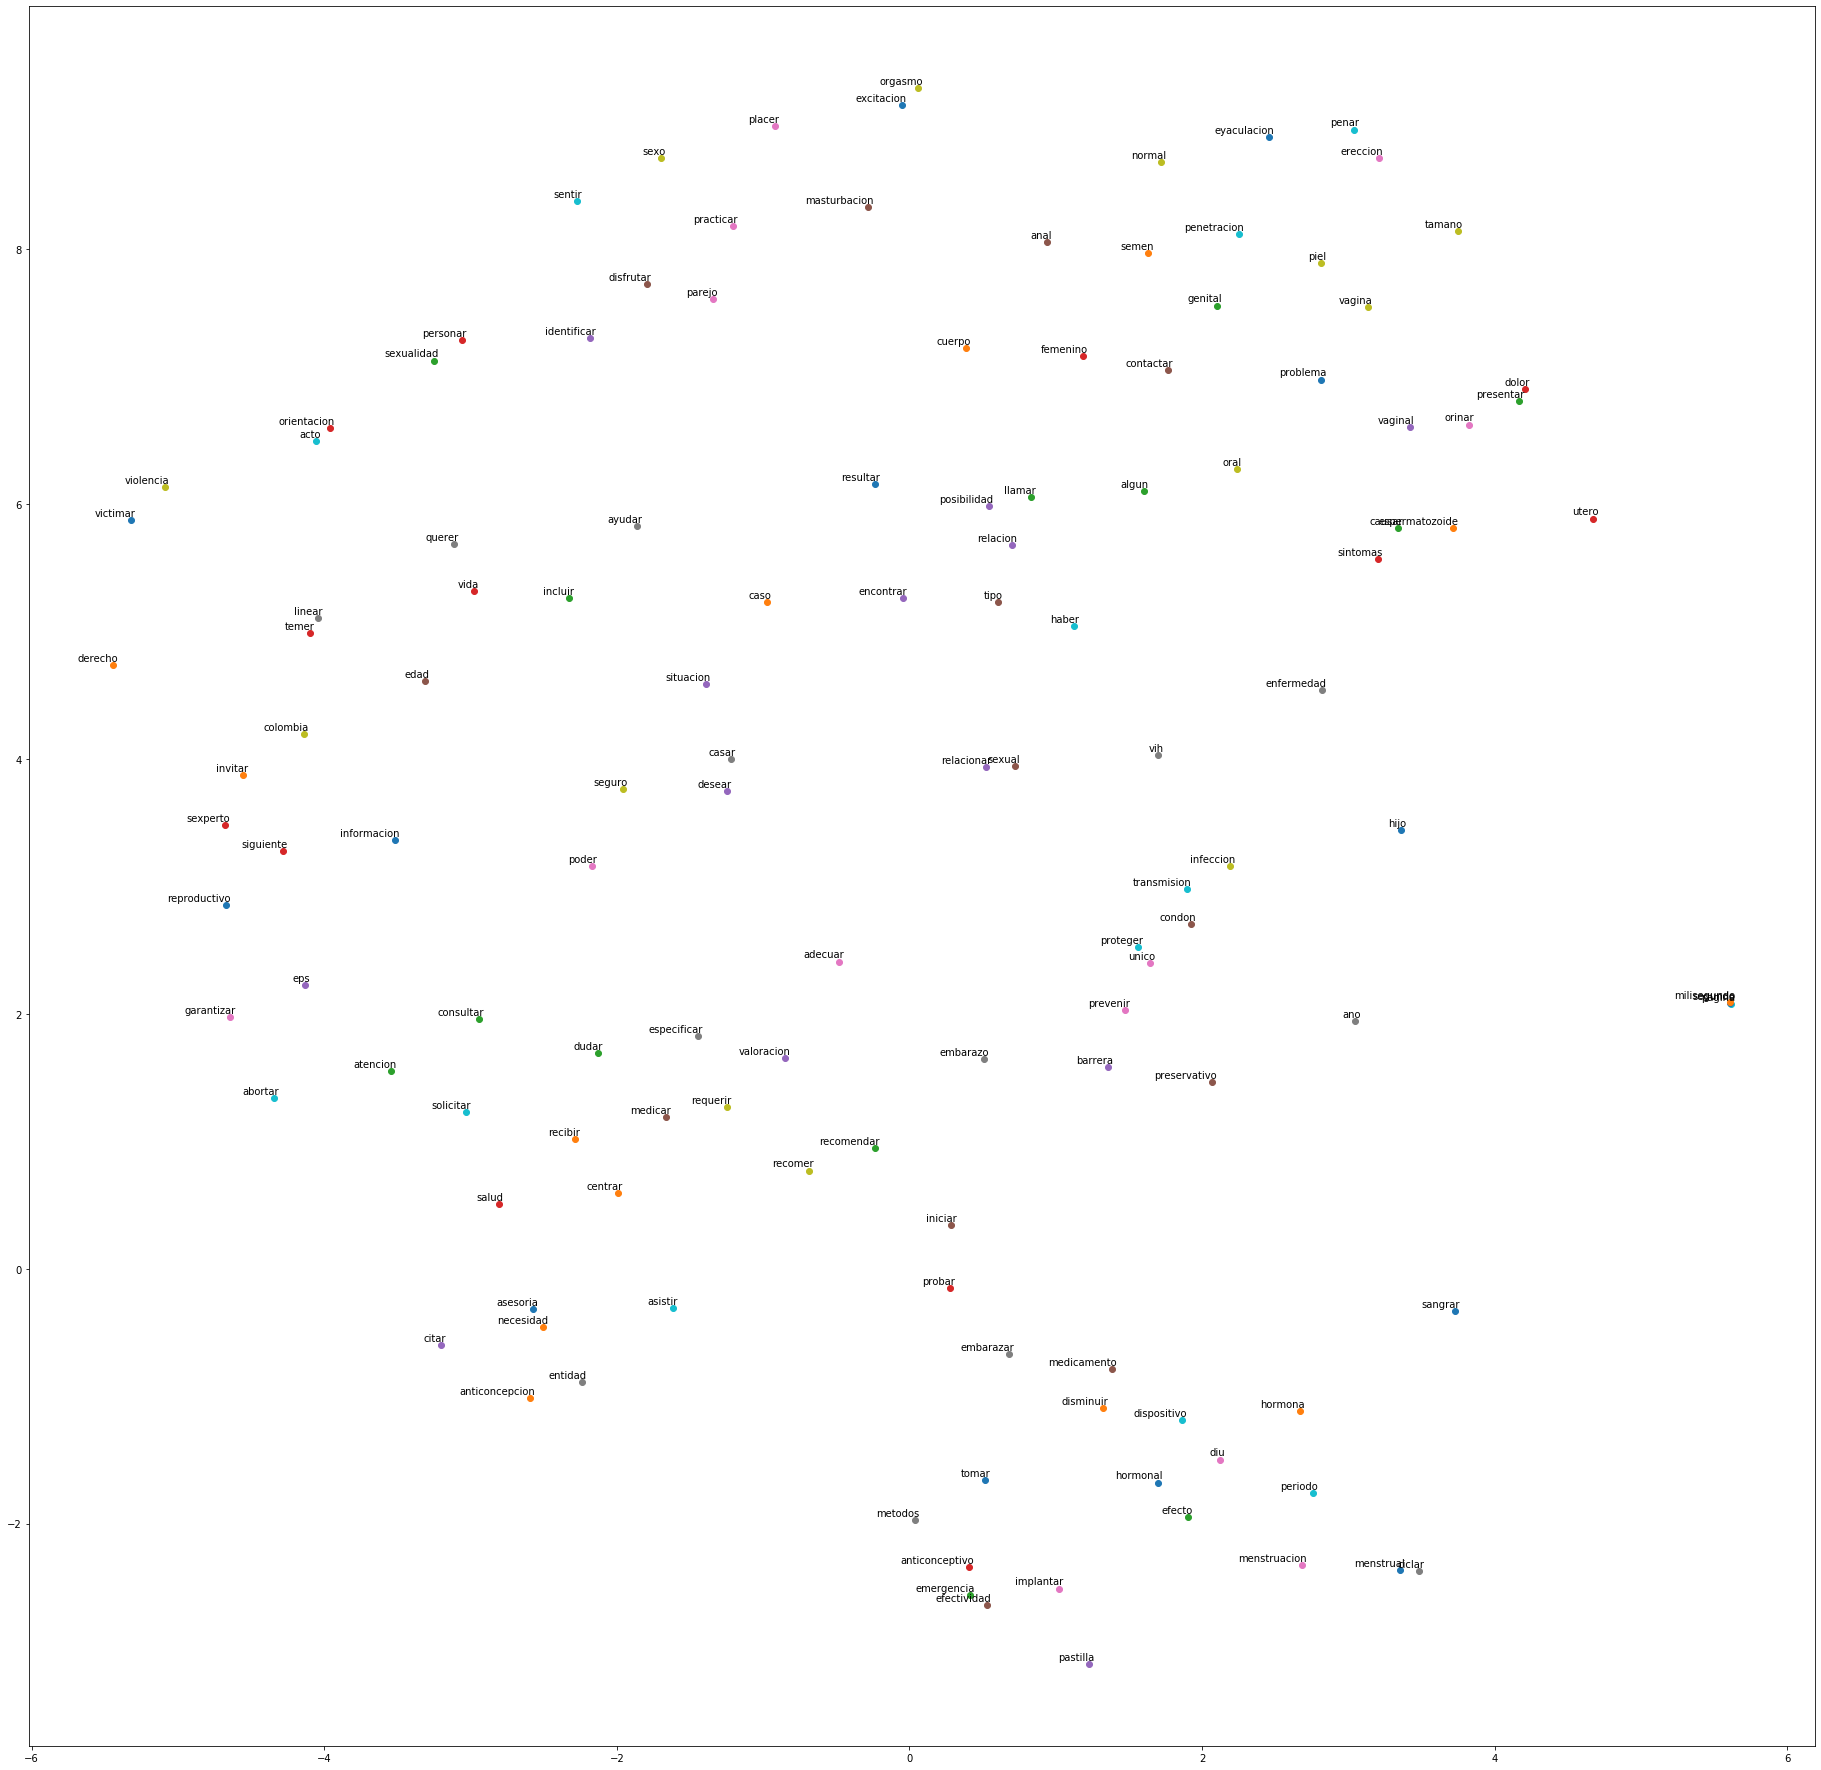

In [118]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# define the function to compute the dimensionality reduction
# and then produce the biplot

"Creates a TSNE model and plots it"
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(32, 32)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig('foo_comp_16072020.png')
plt.savefig('foo_comp_16072020.pdf')

In [142]:
labels = []
tokens = []
for w_index, word in enumerate(model.wv.vocab):
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

/Users/davidbautista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [126]:
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics

In [173]:
#m_c = [['^', 'red'],['s', 'blue'],['o', 'yellow'],['*', 'green'],['h', 'black'],['d', 'pink'],['P', 'darkgray']]
#markers = ['^','s','o','*','h','d','P']
markers = ['o']
colors = ['red', 'blue', 'yellow', 'green', 'black', 'pink', 'gray', '#f1853b', '#1ae891', 'magenta', 'cyan']
m_c = []
for m in markers:
    for c in colors:
        m_c.append([m, c])
print(len(m_c))

11


# Clustering using NLTK :D

In [155]:
X = model[model.wv.vocab]

/Users/davidbautista/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [175]:
NUM_CLUSTERS=11
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[4, 1, 4, 4, 9, 3, 8, 7, 6, 1, 1, 6, 6, 6, 3, 3, 10, 4, 9, 9, 9, 9, 9, 2, 7, 4, 3, 3, 3, 3, 2, 2, 6, 2, 4, 6, 2, 1, 6, 0, 0, 9, 8, 5, 1, 4, 2, 0, 9, 8, 8, 4, 6, 4, 3, 3, 4, 4, 2, 8, 8, 8, 9, 5, 7, 8, 9, 5, 2, 6, 8, 1, 9, 9, 7, 9, 6, 5, 9, 9, 10, 7, 6, 5, 2, 10, 9, 6, 9, 10, 9, 6, 9, 9, 6, 10, 10, 8, 10, 3, 2, 10, 5, 9, 7, 2, 8, 5, 9, 7, 2, 2, 5, 5, 7, 7, 3, 3, 10, 2, 7, 0, 7, 8, 10, 10, 10, 3, 5, 5, 5]


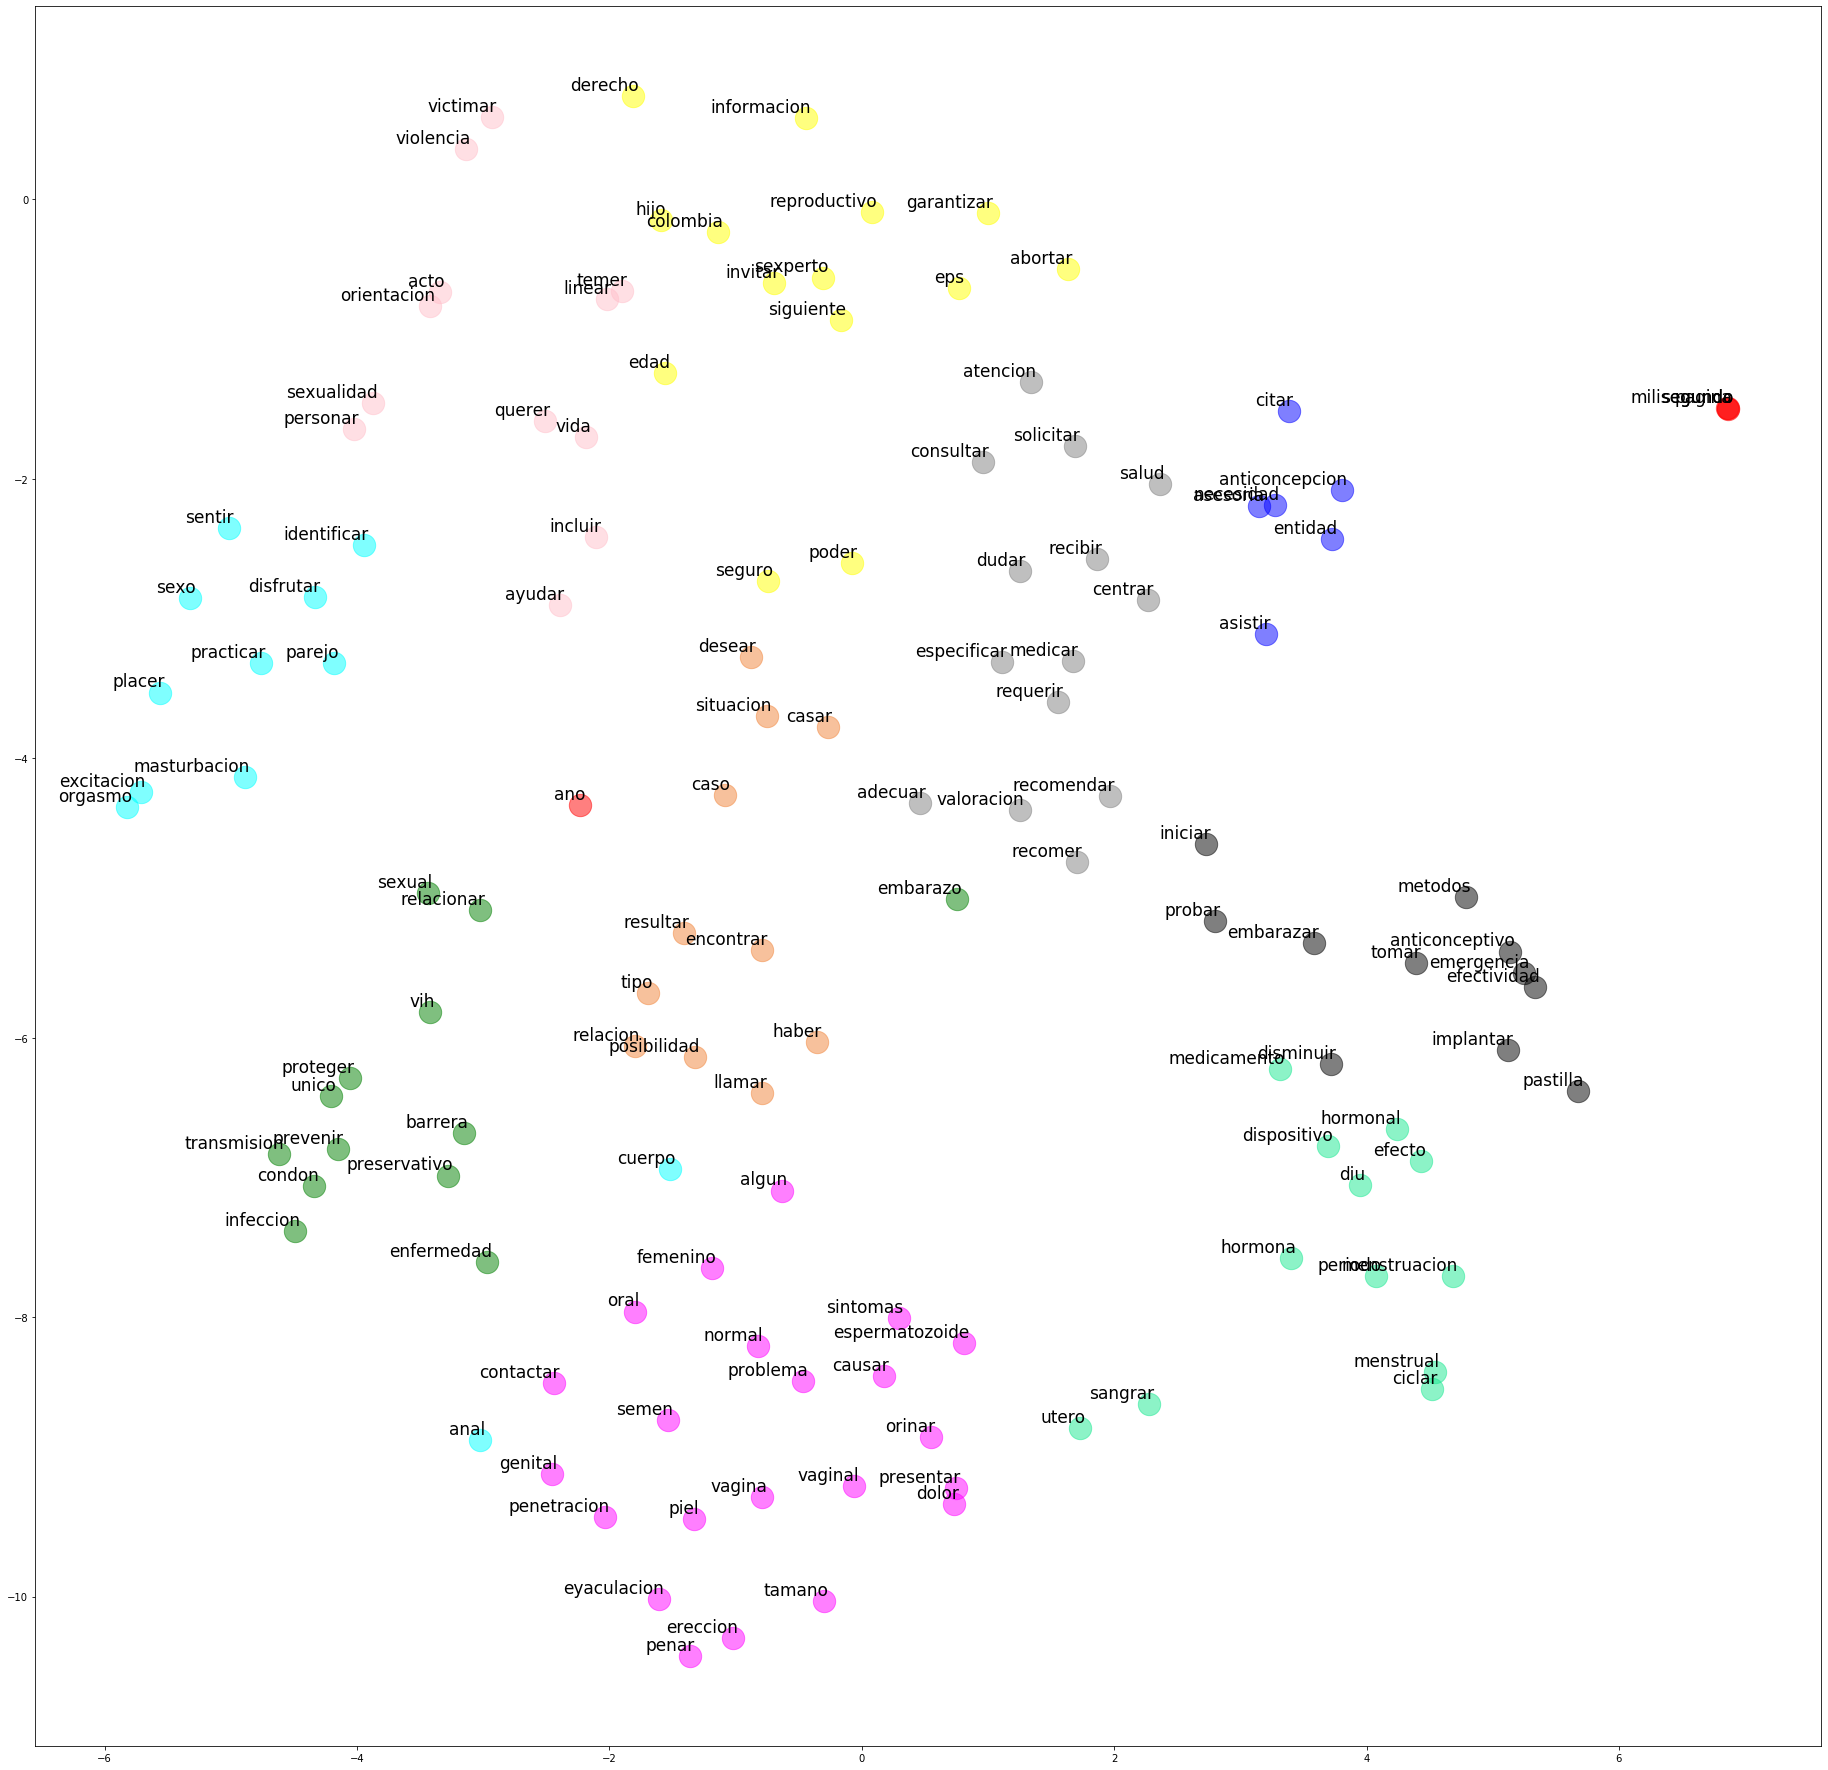

In [176]:
plt.figure(figsize=(32, 32)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], marker=m_c[assigned_clusters[i]][0], color=m_c[assigned_clusters[i]][1], s=500, alpha=0.5) 
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                size=17)
plt.savefig('foo_comp_16072020_clustering-nltk-12clusters.png')
plt.savefig('foo_comp_16072020_clustering-nltk-12clusters.pdf')

# Clusterign usign SCIKIT :D

In [177]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
assigned_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (assigned_labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, assigned_labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[ 8  9  8  8 10  6  3  2  2  9  9  2  0  9  6  6  5  8 10 10 10 10 10  0
  1  8  6  2  6  6  0  0  2  0  8  2  0  9  2  4  4 10  3  7  9  2  2  6
 10  3  3  3  2  2  6  6  8  8  0  3  3  3  1  7  1  3 10  7  2  9  3  9
 10  1  1 10  2  7 10 10  5  1  2  7  0  5 10  2 10  5 10  2 10 10  2  5
  5  3  5  6  0  1  7 10  1  0  3  7 10  1  0  0  7  7  2  1  6  6  5  0
  1  4  1  3  5  5  5  6  7  7  7]
Centroids data
[[-0.03989312 -0.11902298  0.03395757 ...  0.04304866 -0.01078834
  -0.03355775]
 [-0.00540078 -0.04474093 -0.02474967 ...  0.01442477 -0.03398275
  -0.08641849]
 [-0.0364496  -0.04807048  0.02198058 ...  0.01659804 -0.01305491
  -0.07566804]
 ...
 [-0.07590006 -0.01572773  0.08410864 ...  0.01237657  0.00969856
  -0.08224785]
 [-0.06817175 -0.06344625  0.09088021 ...  0.00594168  0.02303918
  -0.05203877]
 [ 0.01179399  0.00849758 -0.03622661 ... -0.00509761 -0.05065349
  -0.13397482]]
Score (Opposite of the value of X on the K-means objectiv

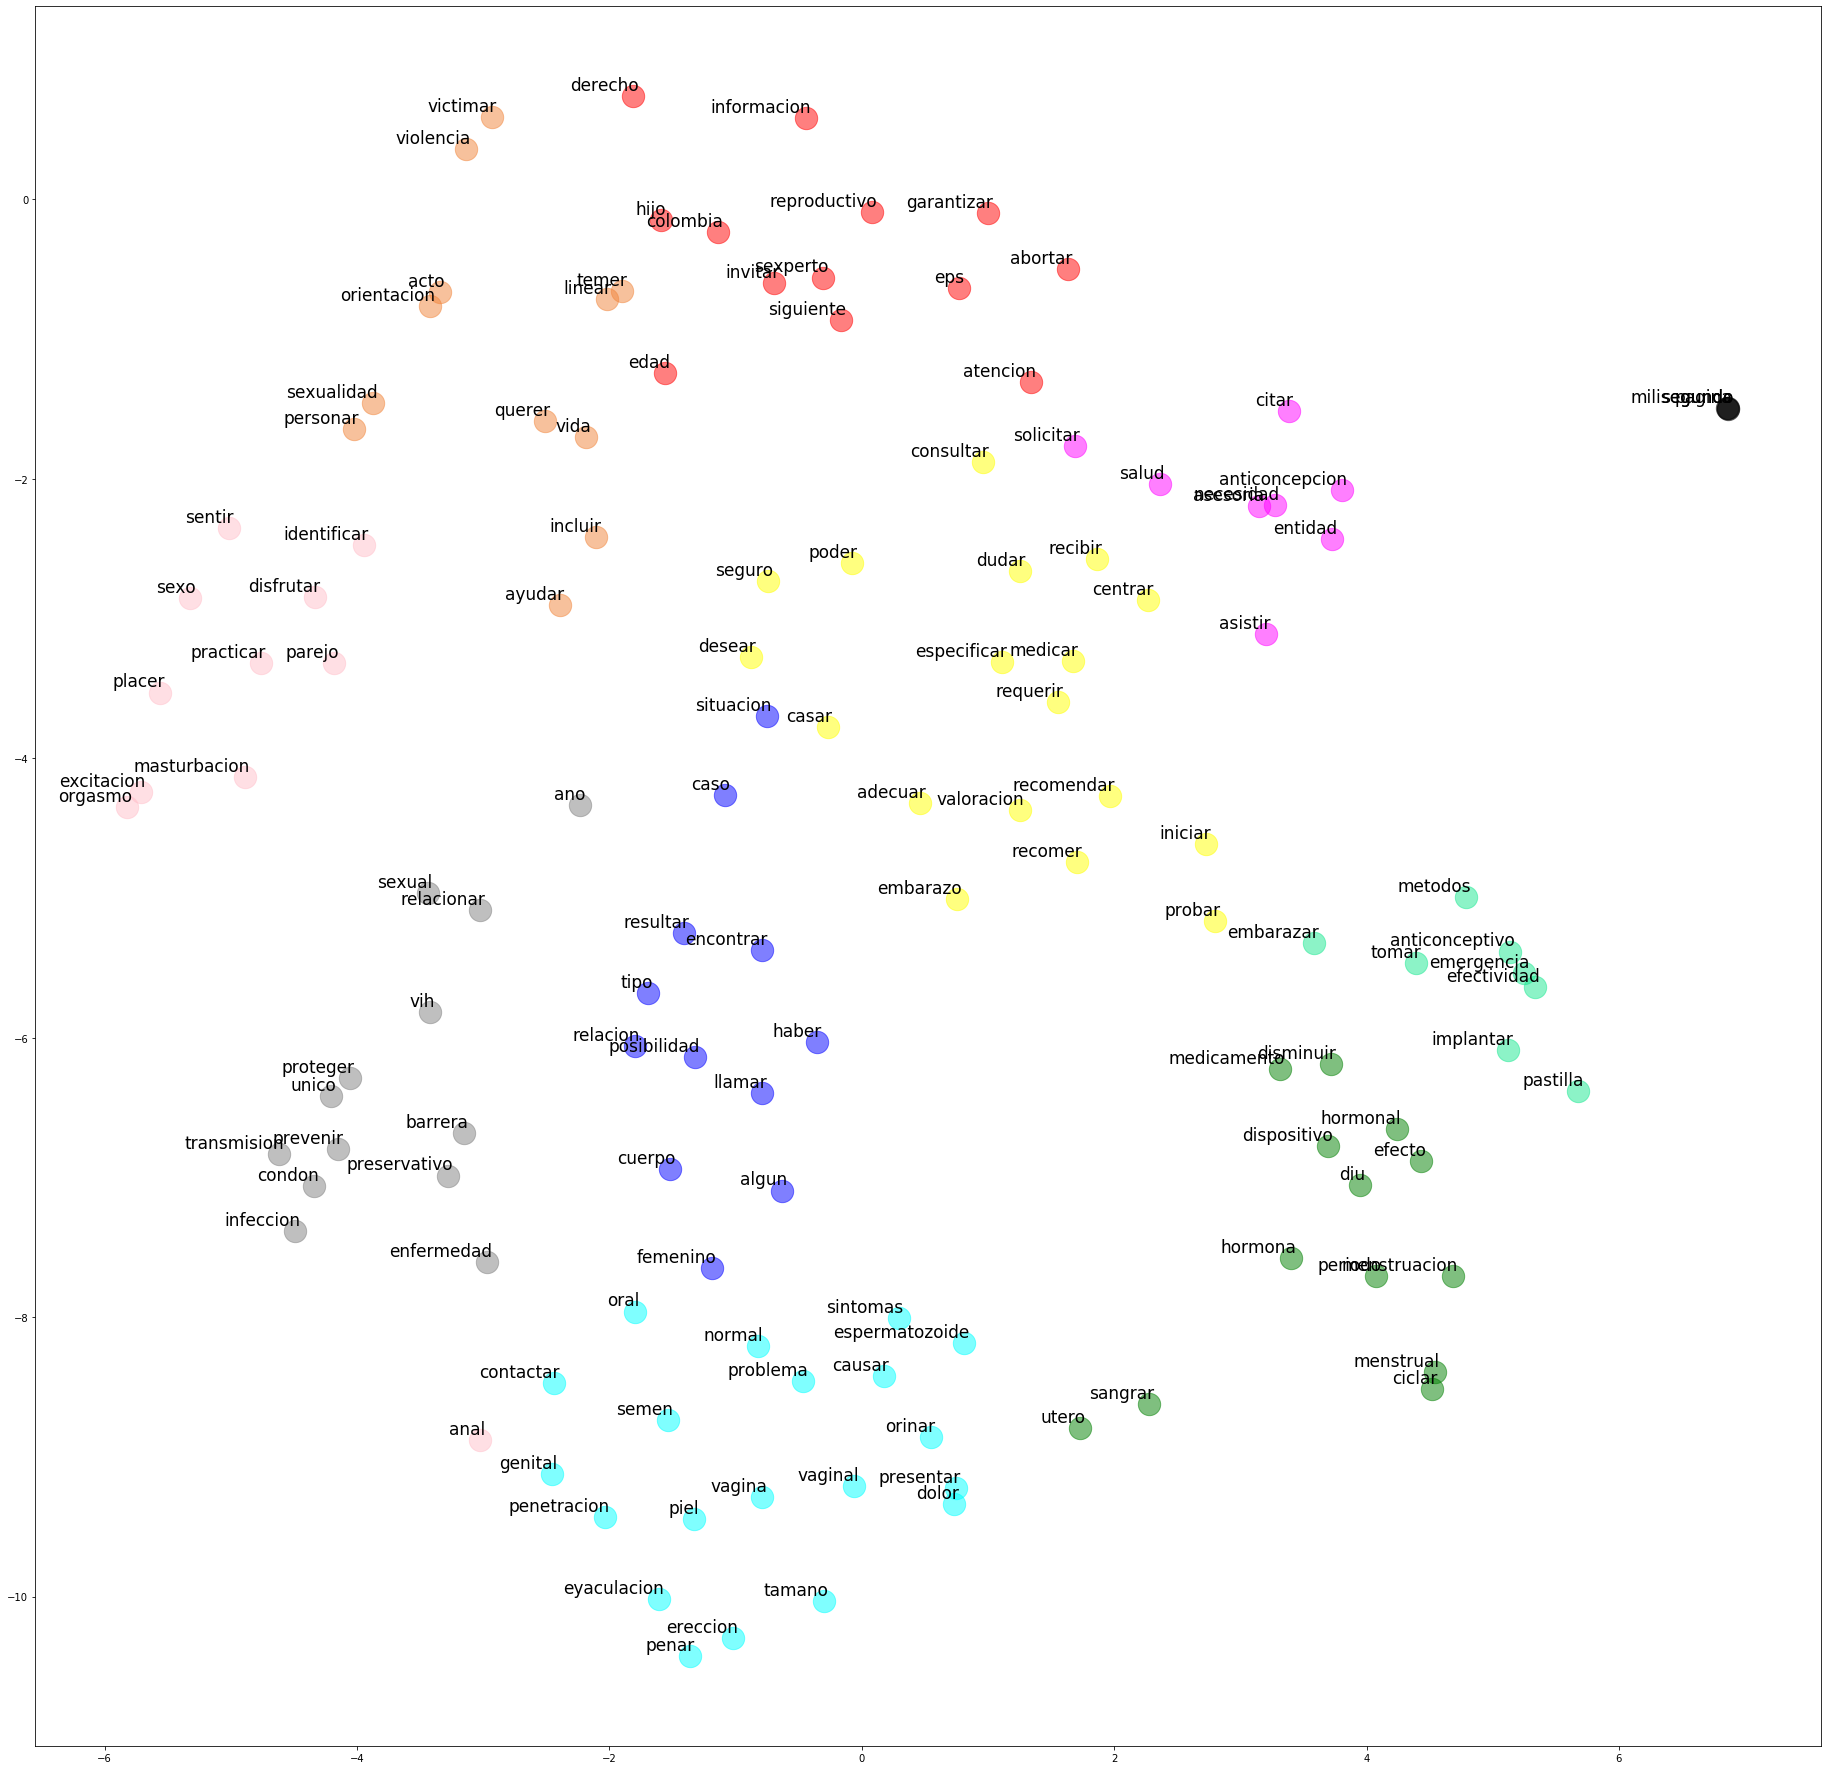

In [178]:
plt.figure(figsize=(32, 32)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i], marker=m_c[assigned_labels[i]][0], c=m_c[assigned_labels[i]][1], s=500, alpha=0.5) 
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                size=17)
plt.savefig('foo_comp_16072020_clustering-scikit-12clusters.png')
plt.savefig('foo_comp_16072020_clustering-scikit-12clusters.pdf')